## Project Summary: Pulsar Star Classification

This project uses the "Predicting a Pulsar Star" dataset to build a binary classification model that distinguishes real pulsar stars (positive class = 1) from spurious signals/noise (negative class = 0). Pulsars are rare, highly magnetized neutron stars emitting detectable radio waves.

* Dataset Overview
    1. Total Samples: 17,898
    2. Spurious (Class 0): 16,259
    3. Pulsars (Class 1): 1,639


* Class Imbalance: Positive class is the minority.

* Features (8 total):
    1. Mean of integrated profile
    2. Std dev of integrated profile
    3. Excess kurtosis of integrated profile
    4. Skewness of integrated profile
    5. Mean of DM-SNR curve
    6. Std dev of DM-SNR curve
    7. Excess kurtosis of DM-SNR curve
    8. Skewness of DM-SNR curve

* Problem Type: Binary Classification

* Goal: Accurately detect real pulsar stars using statistical features.

### 1 Import libraries 

In [1]:
import pandas as pd   
import numpy as np 
import seaborn as sns 
import warnings
warnings.filterwarnings 

import matplotlib.pyplot as plt
from sklearn.metrics import * 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### 2 Import dataset 

In [2]:
data = pd.read_csv('pulsar_data_train.csv')
df = pd.DataFrame(data)
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


### 3 Exploratory data analysis 

In [3]:
# view dimensions of dataset

df.shape

(12528, 9)

In [4]:
# check top 5 data

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [5]:
# check all column name 

df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
# Remove leading spaces from column names

df.columns = df.columns.str.strip()

In [7]:
# View column names again 

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [8]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [9]:
df

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [10]:
# Check distribution of target class column

df['target_class'].value_counts()

target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

In [11]:
# view the percentage distribution of target_class column

df['target_class'].value_counts() / len(df)*100

target_class
0.0    90.796616
1.0     9.203384
Name: count, dtype: float64

In [12]:
# Summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [13]:
# Check null values in a columns 

df.isnull().sum() / len(df)*100

IP Mean             0.000000
IP Sd               0.000000
IP Kurtosis        13.848978
IP Skewness         0.000000
DM-SNR Mean         0.000000
DM-SNR Sd           9.402937
DM-SNR Kurtosis     0.000000
DM-SNR Skewness     4.988825
target_class        0.000000
dtype: float64

In [14]:
# Drop all null values 

df.dropna(inplace = True)

In [15]:
# Check duplicates record 

df.duplicated().sum()

0

In [16]:
# Check statistical summary  

df.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000
mean,111.133750,46.514053,0.479546,1.790673,12.735359,26.327860,8.327933,105.783345,0.091664
std,25.686405,6.781320,1.071155,6.286567,29.766782,19.542634,4.549914,108.166669,0.288567
min,6.187500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.636857,-1.976976,0.000000
25%,100.984375,42.398382,0.024497,-0.188021,1.910535,14.376641,5.788817,34.917943,0.000000
50%,115.234375,46.895026,0.223858,0.202884,2.797659,18.435186,8.427475,83.151969,0.000000
75%,127.328125,51.001785,0.472066,0.930710,5.459866,28.387019,10.721934,139.770330,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


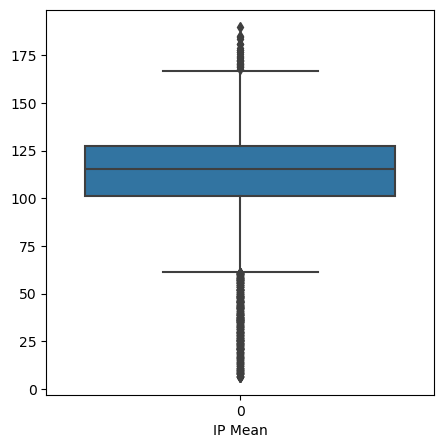

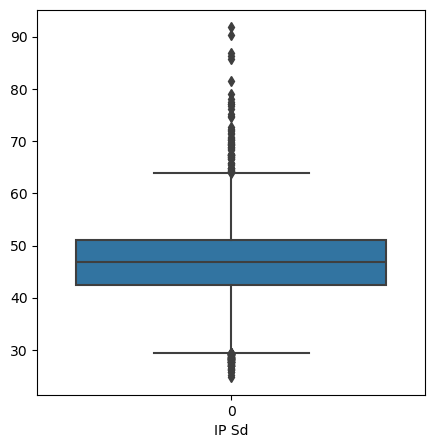

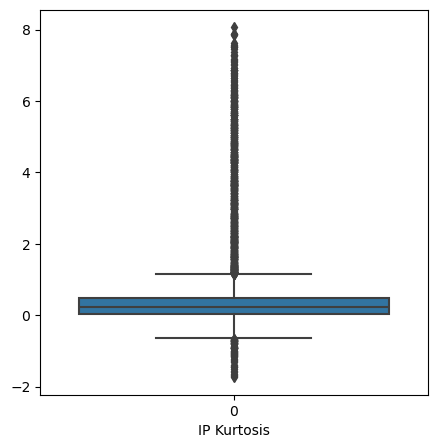

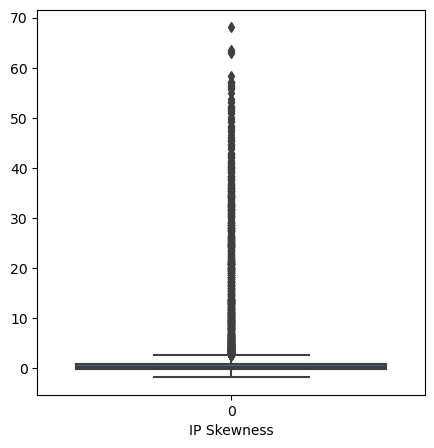

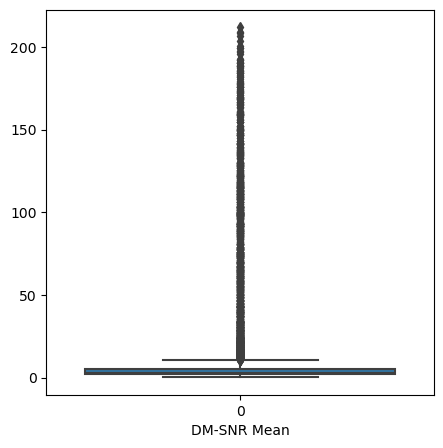

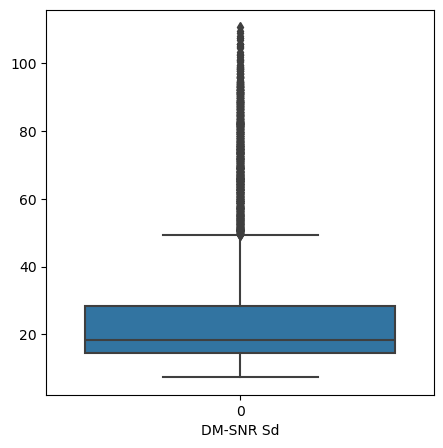

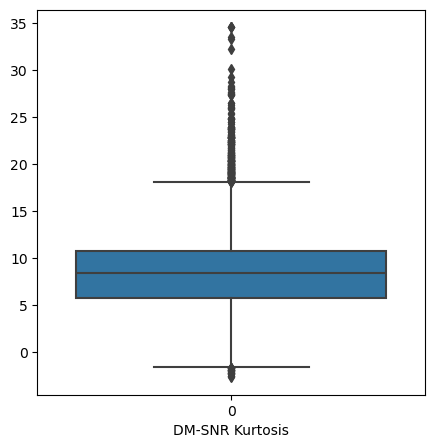

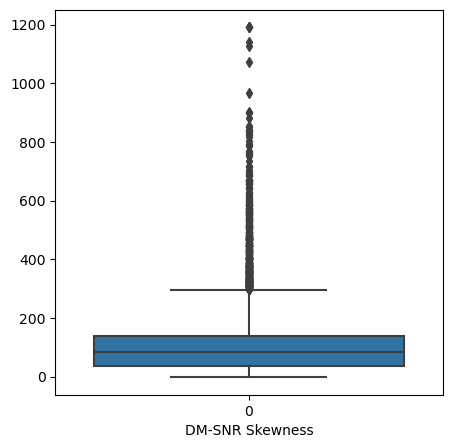

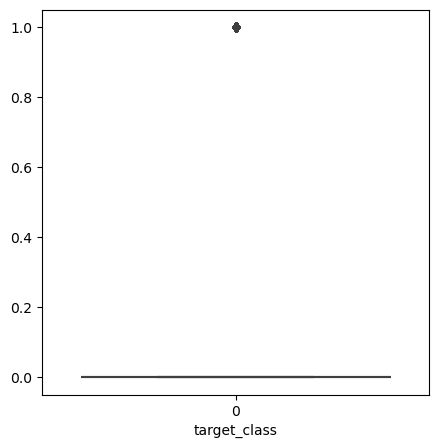

In [17]:
# Draw boxplots to visualize outliers

for i in df: 
    plt.figure(figsize=(5,5))
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

Text(0, 0.5, 'Number of pulsar stars')

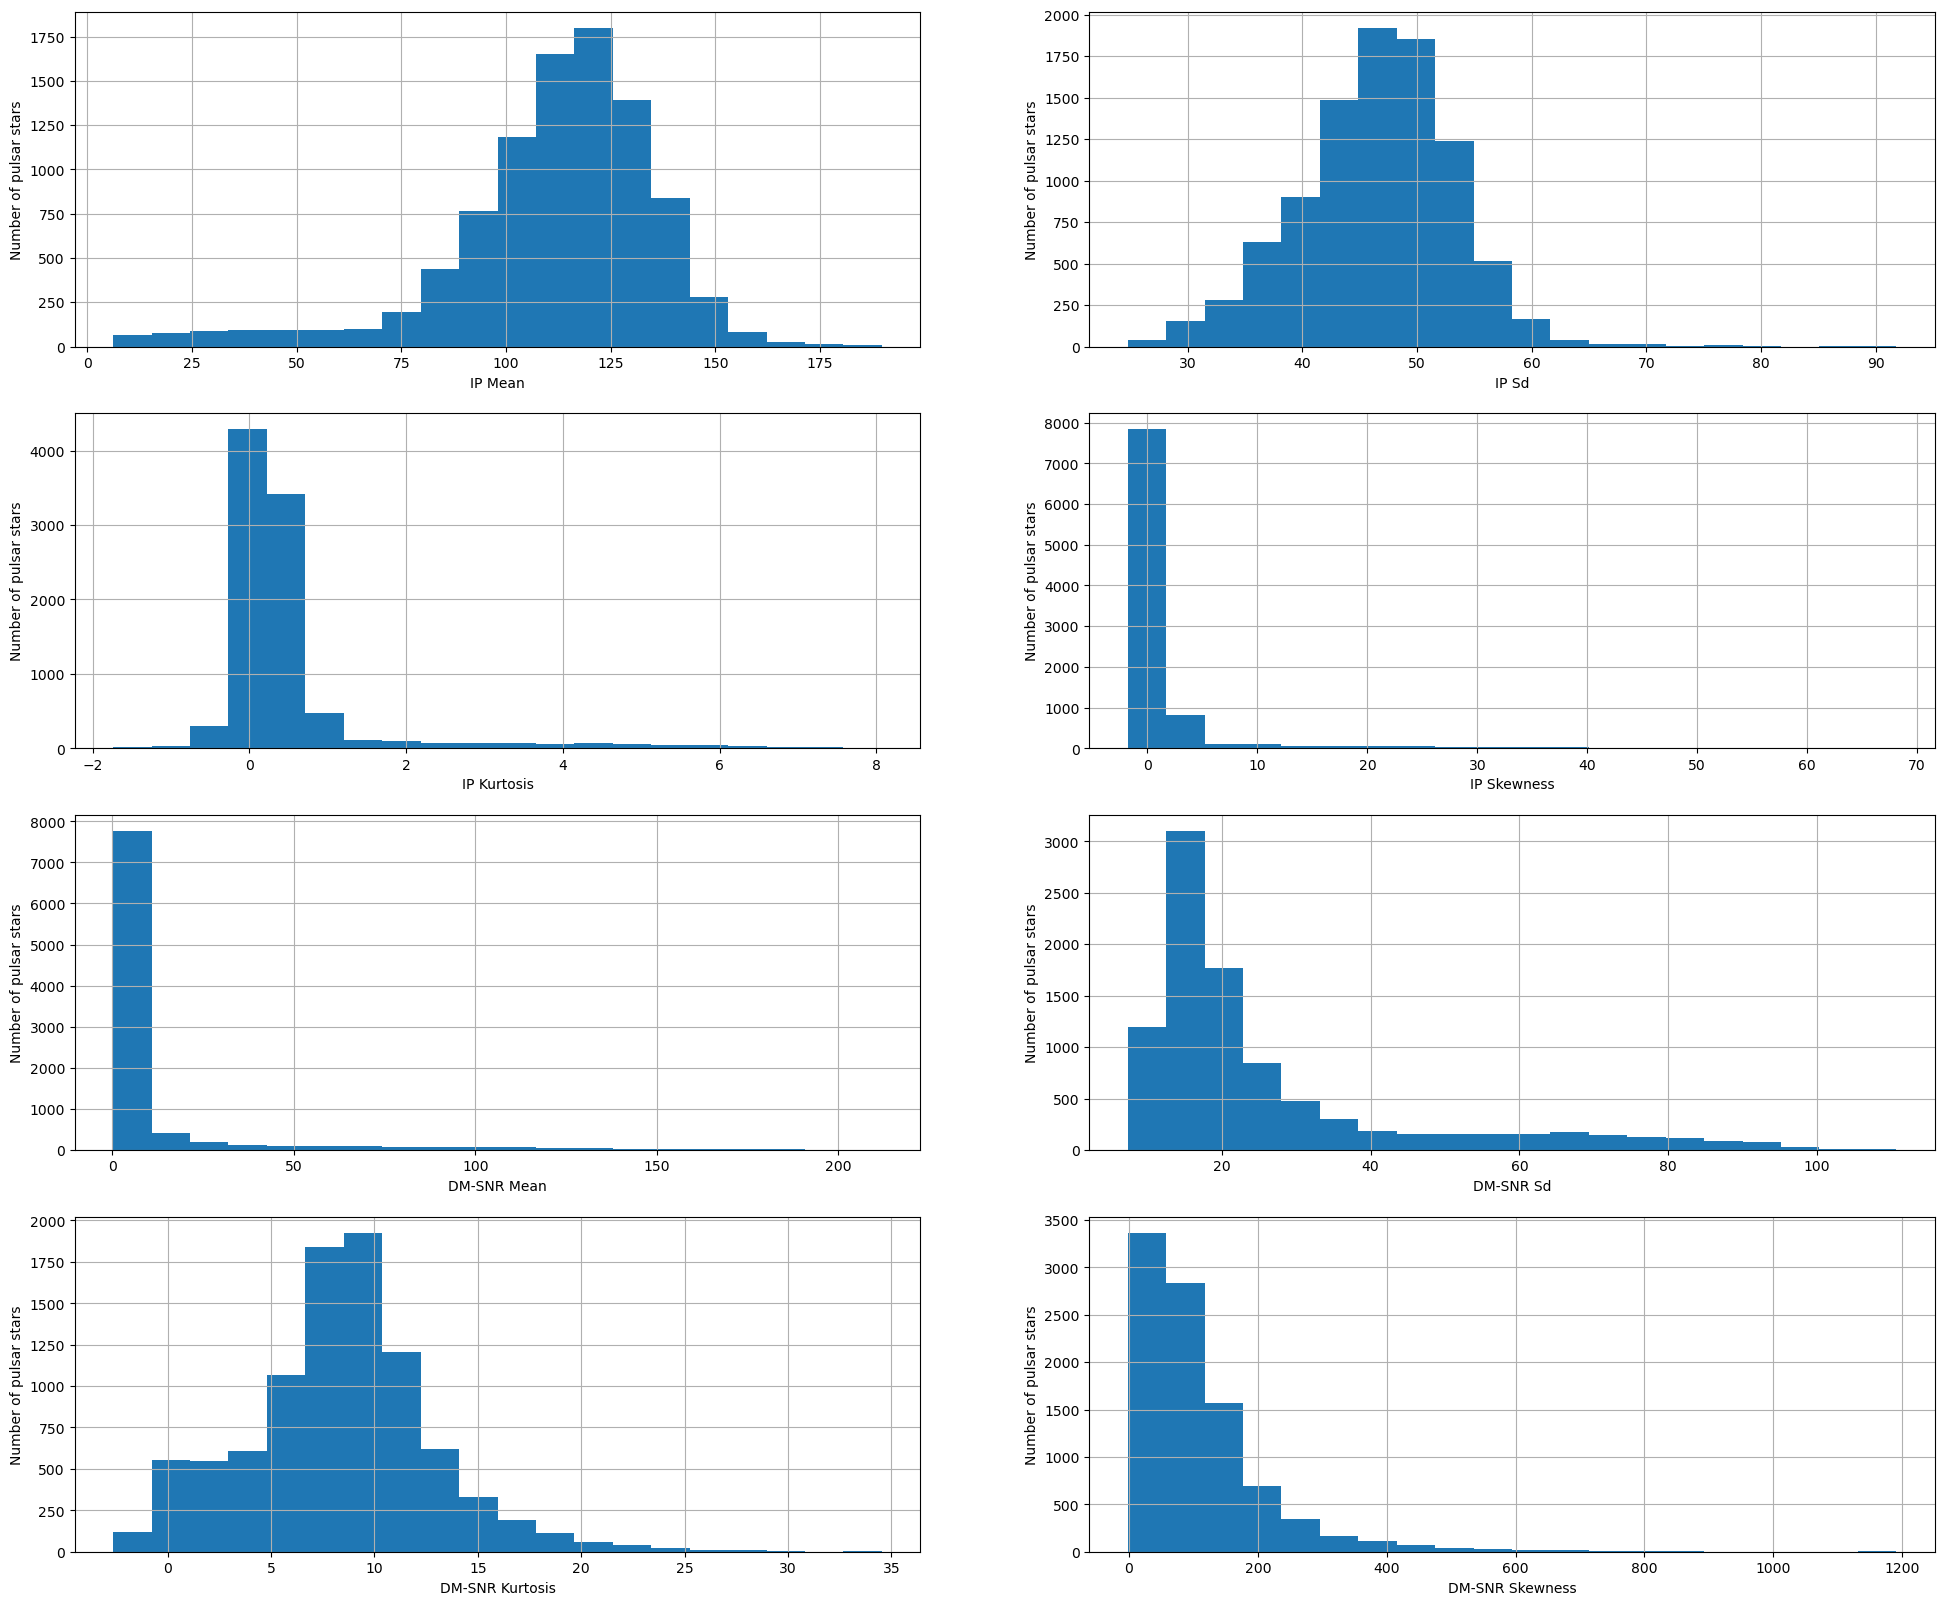

In [18]:
# plot histogram to check distribution

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

### 4 Divide dataset into Dependent or Independent variable

In [19]:
x = df.drop(columns = 'target_class')
y = df['target_class']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [21]:
# check the shape of X_train and X_test

x_train.shape, x_test.shape

((7418, 8), (1855, 8))

In [22]:
SS = StandardScaler() 

In [23]:
x_train = SS.fit_transform(x_train)
x_test = SS.transform(x_test)

In [24]:
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

### 5 Run SVM with default hyperparameters

In [25]:
svc = SVC()

In [26]:
svc.fit(x_train, y_train)

SVC()

In [27]:
y_pred = svc.predict(x_test)

In [28]:
Error = pd.DataFrame({'Actual Value':y_test, 'Predict Value':y_pred}) 
Error

,Actual Value,Predict Value
988,0.0,0.0
2151,0.0,0.0
8531,0.0,0.0
586,0.0,0.0
2424,0.0,0.0
...,...,...
900,0.0,0.0
634,0.0,0.0
10868,0.0,0.0
8303,0.0,0.0


In [29]:
C_report = classification_report(y_pred, y_test)
print(C_report)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1713
         1.0       0.82      0.94      0.88       142

    accuracy                           0.98      1855
   macro avg       0.91      0.96      0.93      1855
weighted avg       0.98      0.98      0.98      1855



In [30]:
A_score = accuracy_score(y_test, y_pred)
A_score

0.9800539083557952

### 6 Run SVM with rbf kernel and C=100.0

* We use the RBF kernel used for non-linear separation. 
* We have seen that there are outliers in our dataset. 
* C=100 to minimize training errors with strict penalties.

In [31]:
svc_rbf = SVC(C=100)

In [32]:
svc_rbf.fit(x_train, y_train) 

SVC(C=100)

In [33]:
rbf_ypred = svc_rbf.predict(x_test)

In [34]:
error_rbf = pd.DataFrame({'Actual Value':y_test, 'Predict Value':rbf_ypred}) 

In [35]:
error_rbf

,Actual Value,Predict Value
988,0.0,0.0
2151,0.0,0.0
8531,0.0,0.0
586,0.0,0.0
2424,0.0,0.0
...,...,...
900,0.0,0.0
634,0.0,0.0
10868,0.0,0.0
8303,0.0,0.0


In [36]:
C_report_rbf = classification_report(y_test, rbf_ypred)
print(C_report_rbf)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1692
         1.0       0.93      0.81      0.87       163

    accuracy                           0.98      1855
   macro avg       0.96      0.90      0.93      1855
weighted avg       0.98      0.98      0.98      1855



In [37]:
A_score_rbf = accuracy_score(y_test, rbf_ypred)
A_score_rbf

0.9778975741239893

### 7 Run SVM with linear kernel

In [38]:
svc_linear = SVC(kernel='linear')

In [39]:
svc_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [40]:
linear_yperd = svc_linear.predict(x_test)

In [41]:
error_linear = pd.DataFrame({'Actual Value':y_test, 'Predict Value':y_pred}) 
error_linear

,Actual Value,Predict Value
988,0.0,0.0
2151,0.0,0.0
8531,0.0,0.0
586,0.0,0.0
2424,0.0,0.0
...,...,...
900,0.0,0.0
634,0.0,0.0
10868,0.0,0.0
8303,0.0,0.0


In [42]:
A_score_linear = accuracy_score(y_test, linear_yperd)
A_score_linear

0.9800539083557952

### 8 Check for overfitting and underfitting

In [43]:
train_score = svc_linear.score(x_train, y_train)
test_score = svc_linear.score(x_test, y_test)

print(f'train_score = {train_score}')
print(f'test_score = {test_score}')

train_score = 0.9792396872472364
test_score = 0.9800539083557952


The training-set accuracy score is 0.9783 while the test-set accuracy to be 0.9830. These two values are quite comparable. So, there is no question of overfitting.

In [44]:
# check class distribution in test set

y_test.value_counts()

target_class
0.0    1692
1.0     163
Name: count, dtype: int64

### 9 Run SVM with polynomial kernel

In [45]:
svc_poly = SVC(kernel='poly')

In [46]:
svc_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [47]:
poly_ypred = svc_poly.predict(x_test)

In [48]:
error_poly = pd.DataFrame({'Actual Value':y_test, 'Predict Value':rbf_ypred}) 
error_poly

,Actual Value,Predict Value
988,0.0,0.0
2151,0.0,0.0
8531,0.0,0.0
586,0.0,0.0
2424,0.0,0.0
...,...,...
900,0.0,0.0
634,0.0,0.0
10868,0.0,0.0
8303,0.0,0.0


In [49]:
A_score_poly = accuracy_score(y_test, poly_ypred)
A_score_poly

0.9800539083557952

### 10 Run SVM with sigmoid kernel 

In [50]:
svc_sigmoid = SVC(kernel='sigmoid')

In [51]:
svc_sigmoid.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [52]:
sigmoid_ypred = svc_sigmoid.predict(x_test)

In [53]:
error_sigmoid = pd.DataFrame({'Actual Value':y_test, 'Predict Value':rbf_ypred}) 
error_sigmoid

,Actual Value,Predict Value
988,0.0,0.0
2151,0.0,0.0
8531,0.0,0.0
586,0.0,0.0
2424,0.0,0.0
...,...,...
900,0.0,0.0
634,0.0,0.0
10868,0.0,0.0
8303,0.0,0.0


In [54]:
A_score_sigmoid = accuracy_score(y_test, sigmoid_ypred)
A_score_sigmoid

0.8711590296495957

We can see that sigmoid kernel is also performing poorly just like with polynomial kernel.

In [55]:
CM = confusion_matrix(y_test, y_pred) 
CM

array([[1684,    8],
       [  29,  134]], dtype=int64)

<Axes: >

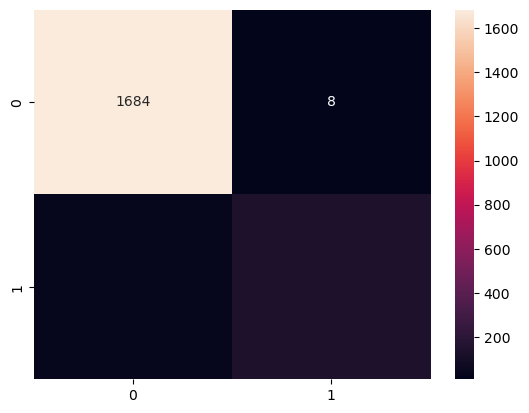

In [56]:
sns.heatmap(CM, fmt='d', annot=True)

### 9 ROC - AUC

An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

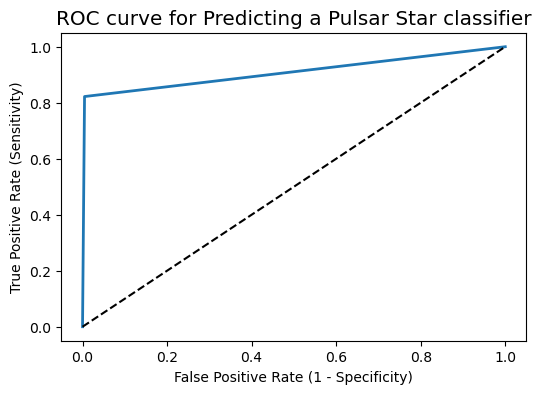

In [57]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [58]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)
ROC_AUC

0.9086788785914227

### 10 Results and conclusion 

In [62]:
import pandas as pd

Result = pd.DataFrame({
    'A_score': [A_score],
    'A_score_rbf': [A_score_rbf],
    'A_score_linear': [A_score_linear],
    'A_score_poly': [A_score_poly],
    'A_score_sigmoid': [A_score_sigmoid],
    'ROC_AUC': [ROC_AUC]
})
Result

,A_score,A_score_rbf,A_score_linear,A_score_poly,A_score_sigmoid,ROC_AUC
0,0.980054,0.977898,0.980054,0.980054,0.871159,0.908679


* There are outliers in our dataset. So, as I increase the value of C to limit fewer outliers, the accuracy increased. This is true with different kinds of kernels.
* We get maximum accuracy is 0.980054.
* ROC AUC of our model is very close to 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

